In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
roba=keras.datasets.fashion_mnist
(imatges_entre, etiquetes_entrenament), (imatges_test, etiquetes_test) = roba.load_data()



In [3]:
imatges_entre.shape

(60000, 28, 28)

In [4]:
len(etiquetes_entrenament)

60000

In [5]:
etiquetes_entrenament


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
nom_roba=['Samarreta','Pantalons','Jersey','Vestit','Abric',
          'Sandàlies','Camisa','Bambes','Bossa','Botes']
nom_roba[etiquetes_entrenament[59999]]


'Sandàlies'

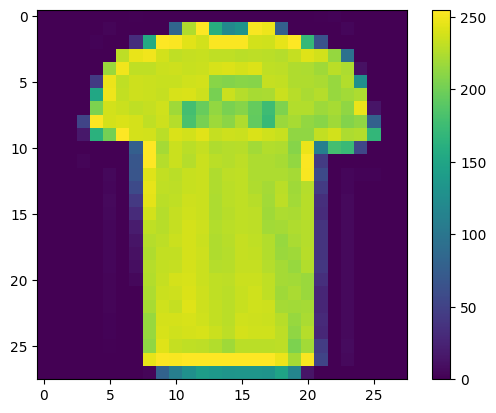

'Samarreta'

In [7]:
x=49875
plt.figure()
plt.imshow(imatges_entre[x])
plt.colorbar()
plt.grid(False)
plt.show()
print
nom_roba[etiquetes_entrenament[x]]


In [8]:
imatges_entre=imatges_entre/255.0
imatges_test=imatges_test/255.0

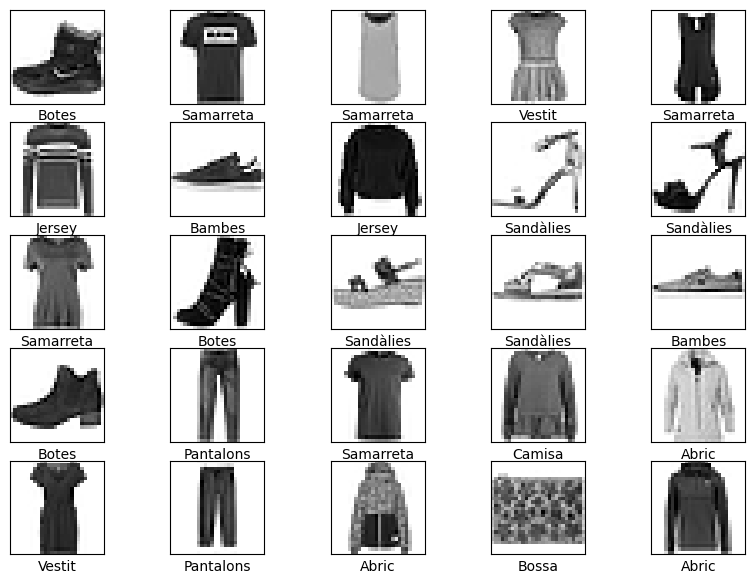

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(7,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imatges_entre[i],cmap=plt.cm.binary)
    plt.xlabel(nom_roba[etiquetes_entrenament[i]])
plt.show()


In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(imatges_entre, etiquetes_entrenament, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2323 - accuracy: 0.9129
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2236 - accuracy: 0.9162
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2156 - accuracy: 0.9191
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2101 - accuracy: 0.9214
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2038 - accuracy: 0.9235
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1997 - accuracy: 0.9249
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1927 - accuracy: 0.9275
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1886 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1838 - accuracy: 0.9312
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.178

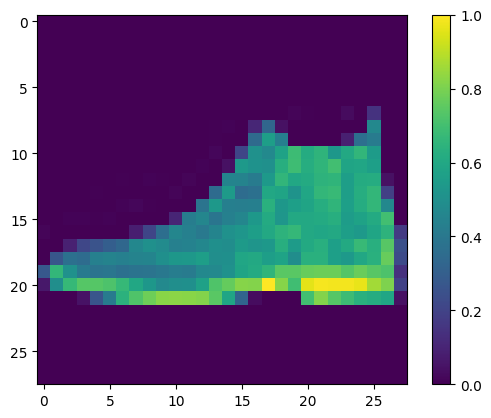

'Botes'

In [15]:
plt.figure()
plt.imshow(imatges_test[0])
plt.colorbar()
plt.grid(False)
plt.show();
print
nom_roba[etiquetes_test[0]]


In [17]:
test_loss, test_acc = model.evaluate(imatges_test, etiquetes_test, verbose=0)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


Test accuracy: 0.8840000033378601

Test loss: 0.3696916699409485


In [18]:
prediccions = model.predict(imatges_test)
prediccions[0]


313/313 [==============================] - 1s 1ms/step


array([4.4144046e-11, 7.6185267e-14, 5.0769311e-10, 1.4446532e-17,
       1.1840069e-13, 2.1145281e-06, 1.4939039e-10, 1.1651993e-02,
       6.2560606e-09, 9.8834592e-01], dtype=float32)

In [19]:
np.argmax(prediccions[0])
nom_roba[np.argmax(prediccions[0])]


'Botes'

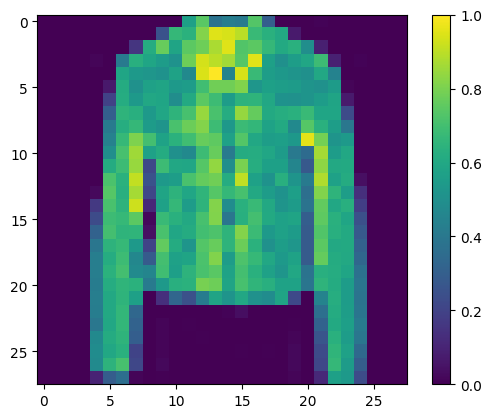

'Abric'

In [21]:
plt.figure()
plt.imshow(imatges_test[10])
plt.colorbar()
plt.grid(False)
plt.show();
print
nom_roba[etiquetes_test[10]]

np.argmax(prediccions[10])
nom_roba[np.argmax(prediccions[10])]

In [22]:
np.argmax(prediccions[9999])
nom_roba[np.argmax(prediccions[9999])]

'Sandàlies'

In [23]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Desat amb èxit")



Desat amb èxit
